### RSI

Relative Strength Index is a momentum Oscillator which measures the speed and change of price movements. It's value oscillates between 0 and 100. <br>Above 70 means that the stock is overbought and hence price might decrease. <br> Below 30 means that the stock is oversold and hence price might increase. <br> Usually 70-30 is more developed economies, where as it is 80-20 for the developing economies like India. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
file = pd.read_csv('BANKNIFTY20JUNFUT.txt', sep=",", header=None)

In [3]:
file

,0,1,2,3,4
0,BANKNIFTY20JUNFUT,20200617,09:15:00,19995.4,1020
1,BANKNIFTY20JUNFUT,20200617,09:15:01,20000.0,1680
2,BANKNIFTY20JUNFUT,20200617,09:15:02,20000.0,1940
3,BANKNIFTY20JUNFUT,20200617,09:15:03,20005.0,640
4,BANKNIFTY20JUNFUT,20200617,09:15:04,20004.8,1140
...,...,...,...,...,...
22496,BANKNIFTY20JUNFUT,20200617,15:29:56,20140.0,20
22497,BANKNIFTY20JUNFUT,20200617,15:29:57,20140.0,20
22498,BANKNIFTY20JUNFUT,20200617,15:29:58,20140.0,20
22499,BANKNIFTY20JUNFUT,20200617,15:29:59,20140.0,20


In [4]:
data=file.drop([0,1,4], axis=1)
data.columns=['Time','Price']
data

,Time,Price
0,09:15:00,19995.4
1,09:15:01,20000.0
2,09:15:02,20000.0
3,09:15:03,20005.0
4,09:15:04,20004.8
...,...,...
22496,15:29:56,20140.0
22497,15:29:57,20140.0
22498,15:29:58,20140.0
22499,15:29:59,20140.0


This is one second data, so first we'll convert it to 5 second m average in order to smoothen the data.<br>
Below is the implementation of <b>Simple Moving Average without using any inbuilt functions</b>. We can also use Modified Moving Average. 

In [5]:
Moving_Avg=[]
n=5
sum=0
for i in range(100):
    if i < n:
        sum+=data.iloc[i]['Price']
        Moving_Avg.append(np.NaN)
    elif i == n:
        sum+=data.iloc[n]['Price']
        Moving_Avg.append(sum/n)
    else:
#         new_sum=(n-1)*(sum/n) + data.iloc[i]['Price']   This is Modified Moving Average
#         sum=new_sum
        sum=sum + data.iloc[i]['Price'] - data.iloc[i-n]['Price']
        Moving_Avg.append(sum/n)
# data['Moving_Avg']=np.array(Moving_Avg)
# data=data.dropna()

The above process takes a lot of time so we can use inbuilt function for faster result.

In [6]:
data['Moving_Avg']=data['Price'].rolling(window=5).mean()
data=data.dropna()
data

,Time,Price,Moving_Avg
4,09:15:04,20004.80,20001.04
5,09:15:05,20017.00,20005.36
6,09:15:06,20017.20,20008.80
7,09:15:07,20020.05,20012.81
8,09:15:08,20025.45,20016.90
...,...,...,...
22496,15:29:56,20140.00,20140.00
22497,15:29:57,20140.00,20140.00
22498,15:29:58,20140.00,20140.00
22499,15:29:59,20140.00,20140.00


In RSI implementation, while calculating average gain or average loss we can either take modified moving average or simple moving average.<br>
Below I have taken <b>Modified moving average while calculating average gain and average loss.</b>

In [7]:
def RSI(DF,n):
    df = DF.copy()
    df['delta']=df['Price'] - df['Price'].shift(1)
    df['gain']=np.where(df['delta']>=0,df['delta'],0)
    df['loss']=np.where(df['delta']<0,abs(df['delta']),0)
    avg_gain = []
    avg_loss = []
    gain = df['gain'].tolist() 
    loss = df['loss'].tolist()
    for i in range(len(df)):
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df['gain'].rolling(n).mean().tolist()[n])
            avg_loss.append(df['loss'].rolling(n).mean().tolist()[n])
        elif i > n:
            avg_gain.append(((n-1)*avg_gain[i-1] + gain[i])/n) # This is Modified moving avergae.
            avg_loss.append(((n-1)*avg_loss[i-1] + loss[i])/n)
    df['avg_gain']=np.array(avg_gain)
    df['avg_loss']=np.array(avg_loss)
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1+df['RS']))
    df = df.drop(['delta','gain','loss','avg_gain','avg_loss','RS'],axis=1)
    df.dropna(inplace=True)
    return df 

In the below implementation I have taken <b>Simple moving average while calculating average gain and average loss.</b>

In [8]:
def RSI_2(DF,n):
    df = DF.copy()
    df['delta']=df['Price'] - df['Price'].shift(1)
    df['gain']=np.where(df['delta']>=0,df['delta'],0)
    df['loss']=np.where(df['delta']<0,abs(df['delta']),0)
    avg_gain = []
    avg_loss = []
    gain = df['gain'].tolist() 
    loss = df['loss'].tolist()
    for i in range(len(df)):
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df['gain'].rolling(n).mean().tolist()[n])
            avg_loss.append(df['loss'].rolling(n).mean().tolist()[n])
        elif i > n:
            avg_gain.append(( n*avg_gain[i-1] + gain[i] - gain[i-n])/n) # This is Simple moving avergae.
            avg_loss.append(( n*avg_loss[i-1] + loss[i] - loss[i-n])/n)
    df['avg_gain']=np.array(avg_gain)
    df['avg_loss']=np.array(avg_loss)
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1+df['RS']))
    df = df.drop(['delta','gain','loss','avg_gain','avg_loss','RS'],axis=1)
    df.dropna(inplace=True)
    return df 

Now we have to decide what to pass as n. I am passing n as 30 considering 30 sec duration RSI.

In [9]:
RSI_signals = pd.DataFrame()
RSI_signals=(RSI(data,30))
RSI_signals.iloc[-122:]

,Time,Price,Moving_Avg,RSI
22379,15:27:59,20142.0,20137.03,54.893623
22380,15:28:00,20140.0,20137.43,52.687437
22381,15:28:01,20140.0,20138.42,52.687437
22382,15:28:02,20140.0,20139.41,52.687437
22383,15:28:03,20140.0,20140.40,52.687437
...,...,...,...,...
22496,15:29:56,20140.0,20140.00,52.687437
22497,15:29:57,20140.0,20140.00,52.687437
22498,15:29:58,20140.0,20140.00,52.687437
22499,15:29:59,20140.0,20140.00,52.687437


In [10]:
a=[]
for i in range(22500-123,22501):
    a.append(i)
RSI_signals=RSI_signals.drop(a)

Next we create a <b>signal</b> for when to buy or short a stock.

In [11]:
overbought=80
oversold=20
RSI_signals
RSI_signals['Signal']=np.where(RSI_signals['RSI']>overbought,-1,np.where(RSI_signals['RSI']<oversold,1,0) )
RSI_signals.describe()

,Price,Moving_Avg,RSI,Signal
count,22343.000000,22343.00000,22343.000000,22343.000000
mean,20306.077409,20306.06528,49.923191,-0.000269
std,145.725075,145.69885,6.930636,0.018921
min,19917.400000,19919.85000,18.792944,-1.000000
25%,20183.950000,20183.89000,45.408840,0.000000
50%,20300.000000,20299.84000,49.807640,0.000000
75%,20435.400000,20435.74000,54.307037,0.000000
max,20617.850000,20615.10000,84.718015,1.000000


<Figure size 432x288 with 0 Axes>

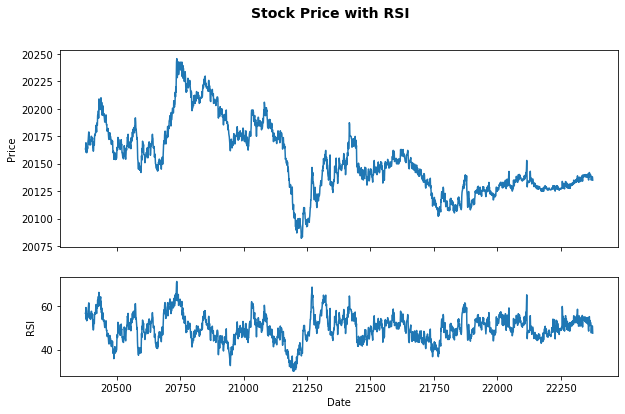

In [12]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2,1]})
RSI_signals.iloc[-2000:,-4].plot(ax=ax0)
ax0.set(ylabel='Price')
RSI_signals.iloc[-2000:,-2].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='RSI')
fig.suptitle('Stock Price with RSI', fontsize=14, fontweight='bold')
plt.show()

In [13]:
initial_capital= float(100000.0)
positions = pd.DataFrame(index=RSI_signals.index).fillna(0.0)
# Buy a 100 shares
positions['Share'] = 100*RSI_signals['Signal']
portfolio = positions.multiply(RSI_signals['Price'], axis=0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(RSI_signals['Price'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(RSI_signals['Price'], axis=0)).sum(axis=1).cumsum()   
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()
portfolio.dropna(inplace=True)
portfolio.describe()

,Share,holdings,cash,total,returns
count,2.234200e+04,2.234200e+04,2.234200e+04,22342.000000,2.234200e+04
mean,-5.474689e+02,-5.474689e+02,9.872617e+04,98178.699535,-6.676546e-07
std,3.857705e+04,3.857705e+04,3.856611e+04,747.678152,2.997770e-04
min,-2.040795e+06,-2.040795e+06,-1.941780e+06,94945.000000,-2.854371e-02
25%,0.000000e+00,0.000000e+00,9.772500e+04,97725.000000,0.000000e+00
50%,0.000000e+00,0.000000e+00,9.772500e+04,97725.000000,0.000000e+00
75%,0.000000e+00,0.000000e+00,9.842000e+04,98420.000000,0.000000e+00
max,2.039505e+06,2.039505e+06,2.135740e+06,100000.000000,2.421003e-02


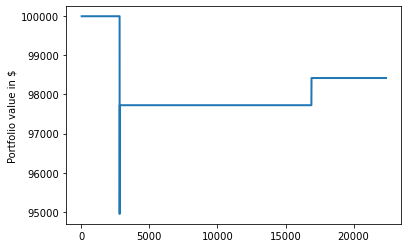

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)
plt.show()

Below I have implemented all the same things for RSI_2 where I have used simple moving average to find average gains and losses.

In [15]:
RSI_signals_2 = pd.DataFrame()
RSI_signals_2=(RSI_2(data,30))
a=[]
for i in range(22500-123,22501):
    a.append(i)
RSI_signals_2=RSI_signals_2.drop(a)
overbought=80
oversold=20
RSI_signals_2['Signal']=np.where(RSI_signals_2['RSI']>overbought,-1,np.where(RSI_signals_2['RSI']<oversold,1,0) )
RSI_signals_2.describe()

,Price,Moving_Avg,RSI,Signal
count,22343.000000,22343.00000,22343.000000,22343.000000
mean,20306.077409,20306.06528,49.806854,-0.000448
std,145.725075,145.69885,10.033287,0.053520
min,19917.400000,19919.85000,11.236863,-1.000000
25%,20183.950000,20183.89000,42.958465,0.000000
50%,20300.000000,20299.84000,49.652203,0.000000
75%,20435.400000,20435.74000,56.627698,0.000000
max,20617.850000,20615.10000,89.303371,1.000000


<Figure size 432x288 with 0 Axes>

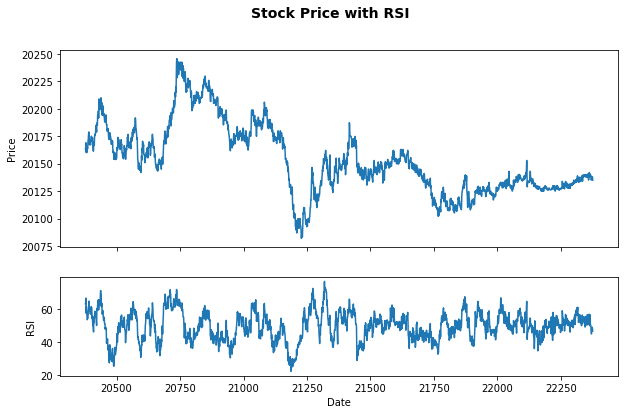

In [16]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2,1]})
RSI_signals_2.iloc[-2000:,-4].plot(ax=ax0)
ax0.set(ylabel='Price')
RSI_signals_2.iloc[-2000:,-2].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='RSI')
fig.suptitle('Stock Price with RSI', fontsize=14, fontweight='bold')
plt.show()

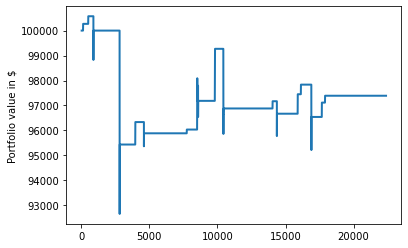

In [17]:
initial_capital= float(100000.0)
positions = pd.DataFrame(index=RSI_signals_2.index).fillna(0.0)
# Buy a 120 shares
positions['Share'] = 100*RSI_signals_2['Signal']
portfolio = positions.multiply(RSI_signals_2['Price'], axis=0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(RSI_signals_2['Price'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(RSI_signals_2['Price'], axis=0)).sum(axis=1).cumsum()   
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()
portfolio.dropna(inplace=True)
portfolio.describe()
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)
plt.show()

We can repeat the process for different values of n, I had used 30 considering half a minute. 

In the below implementation I am using <b> Exponential Moving Average </b>to calculate average gains and average loss.

In [18]:
def RSI_3(DF,n):
    df = DF.copy()
    df['delta']=df['Price'] - df['Price'].shift(1)
    df['gain']=np.where(df['delta']>=0,df['delta'],0)
    df['loss']=np.where(df['delta']<0,abs(df['delta']),0)
    df["avg_gain"]=df["gain"].ewm(span=n,min_periods=n).mean()
    df["avg_loss"]=df["loss"].ewm(span=n,min_periods=n).mean()
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1+df['RS']))
    df = df.drop(['delta','gain','loss','avg_gain','avg_loss','RS'],axis=1)
    df.dropna(inplace=True)
    return df 

In [19]:
RSI_signals_3 = pd.DataFrame()
RSI_signals_3=(RSI_3(data,30))
a=[]
for i in range(22500-123,22501):
    a.append(i)
RSI_signals_3=RSI_signals_3.drop(a)
RSI_signals_3

,Time,Price,Moving_Avg,RSI
33,09:15:33,19995.45,20009.33,29.864769
34,09:15:34,19999.95,20004.74,35.223349
35,09:15:35,20000.00,20000.37,35.282079
36,09:15:36,20008.90,20000.24,44.804140
37,09:15:37,20017.80,20004.42,52.305475
...,...,...,...,...
22372,15:27:52,20137.25,20137.24,47.735056
22373,15:27:53,20138.00,20136.91,49.334379
22374,15:27:54,20138.15,20136.73,49.663686
22375,15:27:55,20138.00,20137.30,49.321010


In [20]:
overbought=80
oversold=20
RSI_signals_3['Signal']=np.where(RSI_signals_3['RSI']>overbought,-1,np.where(RSI_signals_3['RSI']<oversold,1,0) )
RSI_signals_3.describe()

,Price,Moving_Avg,RSI,Signal
count,22344.000000,22344.000000,22344.000000,22344.000000
mean,20306.063507,20306.051999,49.835051,-0.000895
std,145.736631,145.709112,9.878171,0.062752
min,19917.400000,19919.850000,7.178117,-1.000000
25%,20183.937500,20183.887500,43.468831,0.000000
50%,20300.000000,20299.825000,49.675531,0.000000
75%,20435.400000,20435.735000,56.152054,0.000000
max,20617.850000,20615.100000,91.819895,1.000000


<Figure size 432x288 with 0 Axes>

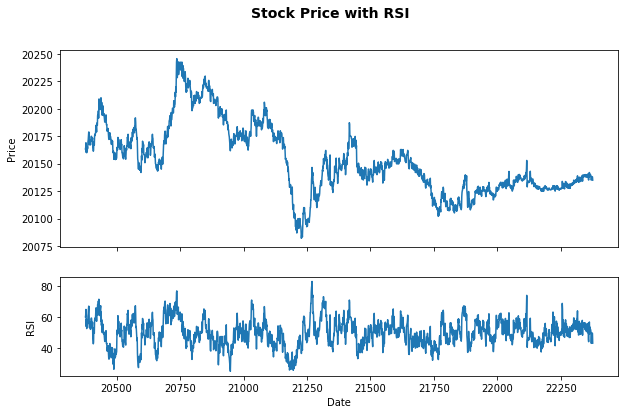

In [21]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2,1]})
RSI_signals_3.iloc[-2000:,-4].plot(ax=ax0)
ax0.set(ylabel='Price')
RSI_signals_3.iloc[-2000:,-2].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='RSI')
fig.suptitle('Stock Price with RSI', fontsize=14, fontweight='bold')
plt.show()

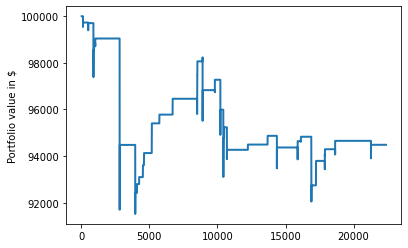

In [22]:
overbought=80
oversold=20
RSI_signals_3
RSI_signals_3['Signal']=np.where(RSI_signals_3['RSI']>overbought,-1,np.where(RSI_signals_3['RSI']<oversold,1,0) )
RSI_signals_3.describe()
initial_capital= float(100000.0)
positions = pd.DataFrame(index=RSI_signals_3.index).fillna(0.0)
# Buy a 120 shares
positions['Share'] = 100*RSI_signals_3['Signal']
portfolio = positions.multiply(RSI_signals_3['Price'], axis=0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(RSI_signals_3['Price'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(RSI_signals_3['Price'], axis=0)).sum(axis=1).cumsum()   
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()
portfolio.dropna(inplace=True)
portfolio.describe()
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)
plt.show()

In [23]:
def RSI_4(DF,n):
    df = DF.copy()
    df['delta']=df[3] - df[3].shift(1)
    df['gain']=np.where(df['delta']>=0,df['delta'],0)
    df['loss']=np.where(df['delta']<0,abs(df['delta']),0)
    df["avg_gain"]=df["gain"].ewm(span=n,min_periods=n).mean()
    df["avg_loss"]=df["loss"].ewm(span=n,min_periods=n).mean()
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1+df['RS']))
    df = df.drop(['delta','gain','loss','avg_gain','avg_loss','RS'],axis=1)
    df.dropna(inplace=True)
    return df 

In [24]:
RSI_signals_4 = pd.DataFrame()

In [25]:
RSI_signals_4=(RSI_4(file,10))
a=[]
for i in range(22500-123,22501):
    a.append(i)
RSI_signals_4=RSI_signals_4.drop(a)
RSI_signals_4

,0,1,2,3,4,RSI
9,BANKNIFTY20JUNFUT,20200617,09:15:09,20016.05,1040,60.195606
10,BANKNIFTY20JUNFUT,20200617,09:15:10,20015.65,940,58.983969
11,BANKNIFTY20JUNFUT,20200617,09:15:11,20024.80,420,73.754016
12,BANKNIFTY20JUNFUT,20200617,09:15:12,20030.05,680,79.045660
13,BANKNIFTY20JUNFUT,20200617,09:15:13,20026.25,380,67.080967
...,...,...,...,...,...,...
22372,BANKNIFTY20JUNFUT,20200617,15:27:52,20137.25,120,45.210970
22373,BANKNIFTY20JUNFUT,20200617,15:27:53,20138.00,140,50.473599
22374,BANKNIFTY20JUNFUT,20200617,15:27:54,20138.15,80,51.609778
22375,BANKNIFTY20JUNFUT,20200617,15:27:55,20138.00,60,50.202167


In [26]:
d=RSI_signals_4.drop([0,2,4],axis=1)

In [27]:
d

,1,3,RSI
9,20200617,20016.05,60.195606
10,20200617,20015.65,58.983969
11,20200617,20024.80,73.754016
12,20200617,20030.05,79.045660
13,20200617,20026.25,67.080967
...,...,...,...
22372,20200617,20137.25,45.210970
22373,20200617,20138.00,50.473599
22374,20200617,20138.15,51.609778
22375,20200617,20138.00,50.202167


In [28]:
d.to_csv('RSI_3.txt', header=False, index=False, sep=',')

<Figure size 432x288 with 0 Axes>

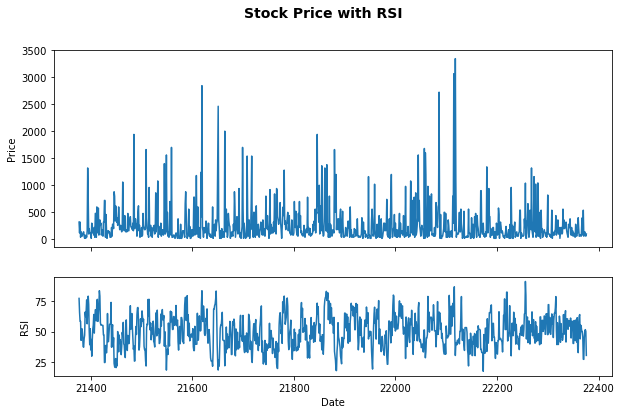

In [29]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2,1]})
RSI_signals_4.iloc[-1000:,-2].plot(ax=ax0)
ax0.set(ylabel='Price')
RSI_signals_4.iloc[-1000:,-1].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='RSI')
fig.suptitle('Stock Price with RSI', fontsize=14, fontweight='bold')
plt.show()

In [30]:
overbought=80
oversold=20
RSI_signals_4['Signal']=np.where(RSI_signals_4['RSI']>overbought,-1,np.where(RSI_signals_4['RSI']<oversold,1,0) )
RSI_signals_4.describe()

,1,3,4,RSI,Signal
count,22368.0,22368.000000,22368.000000,22368.000000,22368.000000
mean,20200617.0,20305.759583,382.464235,49.684136,-0.004873
std,0.0,145.953529,1041.268150,17.133304,0.289954
min,20200617.0,19917.400000,20.000000,0.912506,-1.000000
25%,20200617.0,20183.500000,80.000000,37.826081,0.000000
50%,20200617.0,20299.775000,180.000000,49.350453,0.000000
75%,20200617.0,20435.300000,400.000000,61.389328,0.000000
max,20200617.0,20617.850000,101860.000000,97.793035,1.000000


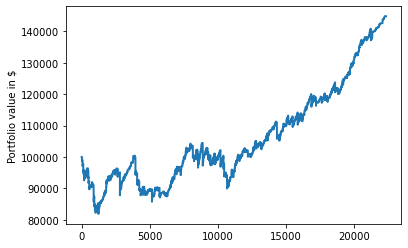

In [32]:
initial_capital= float(100000.0)
positions = pd.DataFrame(index=RSI_signals_4.index).fillna(0.0)
# Buy a 120 shares
positions['Share'] = 100*RSI_signals_4['Signal']
portfolio = positions.multiply(RSI_signals_4[3], axis=0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(RSI_signals_4[3], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(RSI_signals_4[3], axis=0)).sum(axis=1).cumsum()   
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()
portfolio.dropna(inplace=True)
portfolio.describe()
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)
plt.show()